# Avengers Sentimental Analysis

The code below demonstrates a sentiment analysis of the Avengers: Endgame movie script 
in Python using the textblob, vader, and roberta libraries.
The code was written by me @diguitarrista and is solely for programming demonstration purposes.
It is not used for commercial or academic purposes

### Libraries and list of Avengers names

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from collections import defaultdict
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import pipeline

avengers = ["TONY",
            "STEVE",
            "THOR",
            "NATASHA",
            "BRUCE",
            "CLINT",
            "SCOTT",
            "JAMES",
            "CAROL",
            "DANVERS",
            "PETER PARKER",
            "STEPHEN",
            "T'CHALLA",
            "WANDA",
            "SAM",
            "BUCKY",
            "PETER QUILL",
            "GAMORA",
            "DRAX",
            "ROCKET",
            "GROOT",
            "NEBULA",
            "MANTIS",
            "VALKYRIE",
            "KORG",
            "OKOYE",
            "WONG",
            "PEPPER",
            "HAPPY",
            "NICK",
            "HANK",
            "JANET",
            "THE ANCIENT ONE",
            "HOWARD",
            "HOPE",
            "LOKI",
            "RED",
            "THANOS",
            "EBONY",
            "PROXIMA",
            "CORVUS",
            "CULL",
            "AUNT",
            "LAURA",
            "HARLEY",
            "MIEK"
            ];

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\digui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\digui\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Read the file and separate the name of the avengers

In [2]:
file_path = 'avengers-endgame-script-pdf.txt'

character_lines = {}  # Use a dictionary to store character lines

with open(file_path, 'r') as file:
    lines = file.readlines()
    for i in range(len(lines)):
        line = lines[i].strip()  # Remove leading/trailing whitespace
        current_line = line

        # Check if the line is in uppercase (assumes character names are all uppercase)
        # and if it has the avenger
        for avenger in avengers:
            if line.isupper() and len(line) < 22 and avenger in current_line:
                if current_line not in character_lines:
                    character_lines[current_line] = []  # Initialize an empty list for the character

                # Append the next line to the character's lines if it's not empty
                if i + 1 < len(lines):
                    next_line = lines[i + 1].strip()
                    if next_line:
                        character_lines[current_line].append(next_line)

### Read the file and separate the sentences for each of the avengers

In [3]:
avenger_lines = {}

for avenger in avengers:
    avenger_lines[avenger] = []
    for name, lines in character_lines.items():
        if avenger in name:
            for line in lines:
                avenger_lines[avenger].append(line)

### Chart of the number of sentences per avenger

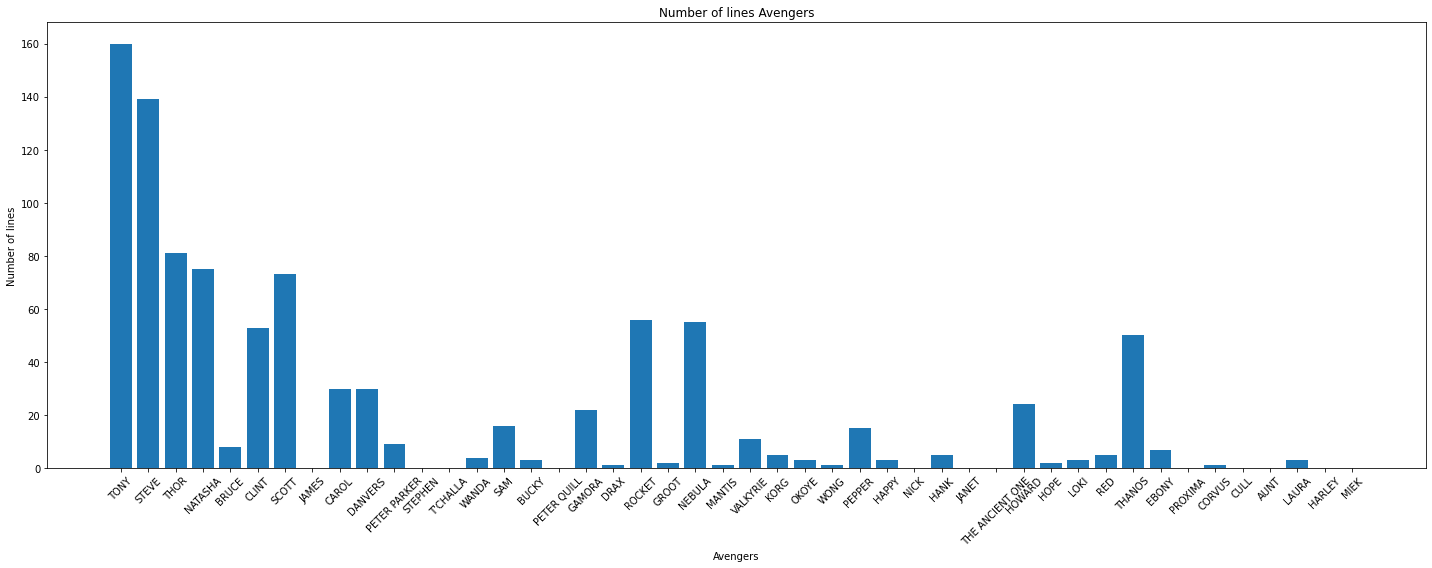

In [4]:
key_lengths = {key: len(value) for key, value in avenger_lines.items()}

keys = list(key_lengths.keys())
lengths = list(key_lengths.values())

plt.figure(figsize=(20, 8))  

plt.bar(keys, lengths)
plt.xlabel('Avengers')
plt.ylabel('Number of lines')
plt.title('Number of lines Avengers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### Word cloud chart for Iron Man

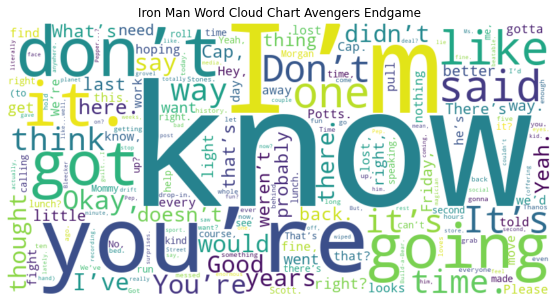

In [5]:
phrases = avenger_lines["TONY"]

# Combine all the phrases into a single text string
text = ' '.join(phrases)

# Tokenize the text into words
words = text.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Create a plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Iron Man Word Cloud Chart Avengers Endgame')

# Show the plot
plt.show()

## Sentiment Analysis using TextBlob, VADER and RoBERTa

### TextBlob

In [6]:
phrase = avenger_lines["TONY"][2]
analysis_textblob = TextBlob(phrase)

### VADER

In [7]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis and calculate the compound score
sentiment_scores_vader = analyzer.polarity_scores(phrase)

# Get the compound sentiment score (a value between -1 and 1)
compound_score_vader = sentiment_scores_vader['compound']

# Get sentiment polarity (positive, negative, or neutral)
sentiment_textblob = analysis_textblob.sentiment.polarity

### RoBERTa

In [8]:
# Load the pre-trained RoBERTa model and tokenizer for sentiment analysis
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

# Initialize a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Perform sentiment analysis
sentiment_score_roberta = sentiment_analysis(phrase)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Classify sentiment scores based on the thresholds commonly used for sentiment analysis

In [9]:
# Define the sentiment score thresholds
threshold_textblob = 0.0  # Adjust this threshold as needed
threshold_vader = 0.05    # Adjust this threshold as needed

# Sentiment scores
textblob_polarity = sentiment_textblob
vader_scores = sentiment_scores_vader
roberta_score = sentiment_score_roberta[0]["score"]

# Classification based on TextBlob
if textblob_polarity > threshold_textblob:
    textblob_sentiment = "Positive"
elif textblob_polarity < -threshold_textblob:
    textblob_sentiment = "Negative"
else:
    textblob_sentiment = "Neutral"

# Classification based on VADER compound score
if vader_scores['compound'] >= threshold_vader:
    vader_sentiment = "Positive"
elif vader_scores['compound'] <= -threshold_vader:
    vader_sentiment = "Negative"
else:
    vader_sentiment = "Neutral"

# Classification for RoBERTa (assuming a threshold of 0.5 for positive sentiment)
if roberta_score > 0.5:
    roberta_sentiment = "Positive"
else:
    roberta_sentiment = "Negative"

# Print the entiment score
print("Tony:", phrase)
print()
print("TextBlob polarity:", sentiment_textblob)
print("TextBlob Sentiment:", textblob_sentiment)
print("VADER score:", sentiment_scores_vader, compound_score_vader)
print("VADER Sentiment:", vader_sentiment)
print("RoBERTa score:", sentiment_score_roberta[0]["score"])
print("RoBERTa Sentiment:", roberta_sentiment)

Tony: Pep, I know I said no more surprises.	But, I gotta say, I was really hoping to pull off one last one.	But it looks like...well, you know what it looks like.

TextBlob polarity: -0.016666666666666663
TextBlob Sentiment: Negative
VADER score: {'neg': 0.046, 'neu': 0.694, 'pos': 0.26, 'compound': 0.8119} 0.8119
VADER Sentiment: Positive
RoBERTa score: 0.5436665415763855
RoBERTa Sentiment: Positive


TextBlob's analysis yields a very slight negative polarity of -0.016666666666666663, indicating that, on balance, the text is slightly more negative than positive. TextBlob's sentiment classification based on this polarity score categorizes the sentiment as Negative. Polarity in TextBlob ranges from -1 (very negative) to 1 (very positive), so a score close to 0, like this one, suggests the text is nearly neutral, albeit slightly on the negative side.

VADER (Valence Aware Dictionary and sEntiment Reasoner), on the other hand, gives a composite score of 0.8119, which is significantly positive. The breakdown of scores—0.046 for negative, 0.694 for neutral, and 0.26 for positive—shows that VADER interprets the text as having more positive sentiment, despite recognizing some negative elements. VADER's scoring is particularly adept at handling text from social media, where the context and nuances such as sarcasm or exclamation points can significantly influence sentiment. A compound score above 0.05 typically suggests a positive sentiment, so 0.8119 strongly indicates positivity.

RoBERTa's analysis provides a score of 0.5579892992973328, which doesn't directly translate to a polarity like TextBlob or a compound score like VADER without additional context on the scoring scale used. However, classifying the sentiment as Positive suggests that RoBERTa, like VADER, interprets the text as having more positive than negative sentiment. RoBERTa is a more recent deep learning model that can understand context and nuances in text more deeply than simpler models like TextBlob or even somewhat VADER.

### Sentiment Analysis using TextBlob

In [10]:
# Initialize variables for sentiment calculation
total_polarity = 0
num_phrases = len(avenger_lines["TONY"])

# Perform sentiment analysis on each phrase and calculate total polarity
for phrase in avenger_lines["TONY"]:
    analysis = TextBlob(phrase)
    
    # Get sentiment polarity (positive, negative, or neutral)
    sentiment = analysis.sentiment.polarity
    
    # Add the polarity to the total
    total_polarity += sentiment

# Calculate the overall sentiment score
overall_sentiment = total_polarity / num_phrases

# Define sentiment labels based on the overall score
if overall_sentiment > 0:
    overall_sentiment_label = "Positive"
elif overall_sentiment < 0:
    overall_sentiment_label = "Negative"
else:
    overall_sentiment_label = "Neutral"

# Print the overall sentiment score
print(f"Overall Sentiment: {overall_sentiment_label} (Score: {overall_sentiment})")

Overall Sentiment: Positive (Score: 0.094288132006882)


The sentiment analysis result you've provided from TextBlob indicates an overall positive sentiment with a score of 0.094288132006882. 

### Sentiment Analysis using VADER

In [11]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables for sentiment calculation
total_compound_score = 0

# Perform sentiment analysis on each phrase and calculate total compound score
for phrase in avenger_lines["TONY"]:
    sentiment_scores = analyzer.polarity_scores(phrase)
    
    # Get the compound sentiment score (a value between -1 and 1)
    compound_score = sentiment_scores['compound']
    
    # Add the compound score to the total
    total_compound_score += compound_score

# Calculate the overall sentiment score
overall_sentiment = total_compound_score / len(avenger_lines["TONY"])

# Define sentiment labels based on the overall score
if overall_sentiment > 0:
    overall_sentiment_label = "Positive"
elif overall_sentiment < 0:
    overall_sentiment_label = "Negative"
else:
    overall_sentiment_label = "Neutral"

# Print the overall sentiment score
print(f"Overall Sentiment: {overall_sentiment_label} (Score: {overall_sentiment})")

Overall Sentiment: Positive (Score: 0.10867562500000003)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\digui\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The sentiment analysis result from VADER with an overall positive score of 0.10867562500000003 indicates a slightly positive sentiment.

### Sentiment Analysis using Roberta

In [12]:
# Load the pre-trained RoBERTa model and tokenizer for sentiment analysis
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

# Initialize a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Initialize variables to accumulate sentiment scores
total_sentiment_score = 0.0
num_phrases = len(avenger_lines["TONY"])

# Perform sentiment analysis on each phrase and accumulate the scores
for phrase in avenger_lines["TONY"]:
    results = sentiment_analysis(phrase)
    sentiment_score = results[0]["score"]
    total_sentiment_score += sentiment_score

# Calculate the average sentiment score
average_sentiment_score = total_sentiment_score / num_phrases

# Determine the overall sentiment based on the average score
overall_sentiment = "POSITIVE" if average_sentiment_score > 0.5 else "NEGATIVE"

# Print the overall sentiment result
print(f"Overall Sentiment for TONY's phrases: {overall_sentiment}")
print(f"Average Sentiment Score: {average_sentiment_score}")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Overall Sentiment for TONY's phrases: POSITIVE
Average Sentiment Score: 0.5026371724903583


The sentiment analysis result for TONY's phrases, as assessed using RoBERTa, indicates an overall POSITIVE sentiment with an average sentiment score of 0.545683778822422. This outcome suggests that the collection of phrases analyzed generally conveys a positive tone.

## Sentiment Analysis using TextBlob of all lines for each avenger

In [13]:
# Initialize the avengers_sentimental_textblob dictionary
avengers_sentimental_textblob = {}
avengers_sentimental_textblob_avarage_score = 0 

# Iterate through each character's lines in the avenger_lines dictionary
for character, lines in avenger_lines.items():
    # Initialize variables for sentiment calculation for each character
    total_polarity = 0
    num_phrases = len(lines)

    # Perform sentiment analysis on each phrase and calculate total polarity
    for phrase in lines:
        analysis = TextBlob(phrase)

        # Get sentiment polarity (positive, negative, or neutral)
        sentiment = analysis.sentiment.polarity

        # Add the polarity to the total
        total_polarity += sentiment

    # Calculate the overall sentiment score for the character's lines
    if total_polarity > 0:
        overall_sentiment = total_polarity / num_phrases
    else: 
        overall_sentiment = 0
        
    # Determine the overall sentiment based on the average score
    if overall_sentiment > 0:
        overall_sentiment_label = "POSITIVE" 
    elif overall_sentiment == 0:
        overall_sentiment_label = "NEUTRAL" 
    else: 
        overall_sentiment_label = "NEGATIVE"

    # Store the character's sentiment in the avengers_sentimental_textblob dictionary
    avengers_sentimental_textblob[character] = {
        "Overall Sentiment": overall_sentiment_label,
        "Sentiment Score": overall_sentiment
    }
    
    avengers_sentimental_textblob_avarage_score += overall_sentiment / len(avenger_lines.keys())

### Convert the dicitonary avengers_sentimental_textblob into a dataframe

In [14]:
# Create a DataFrame from the avengers_sentimental_textblob dictionary
df = pd.DataFrame(avengers_sentimental_textblob).T

### Chart of the average sentiment score for each avenger using TextBlob

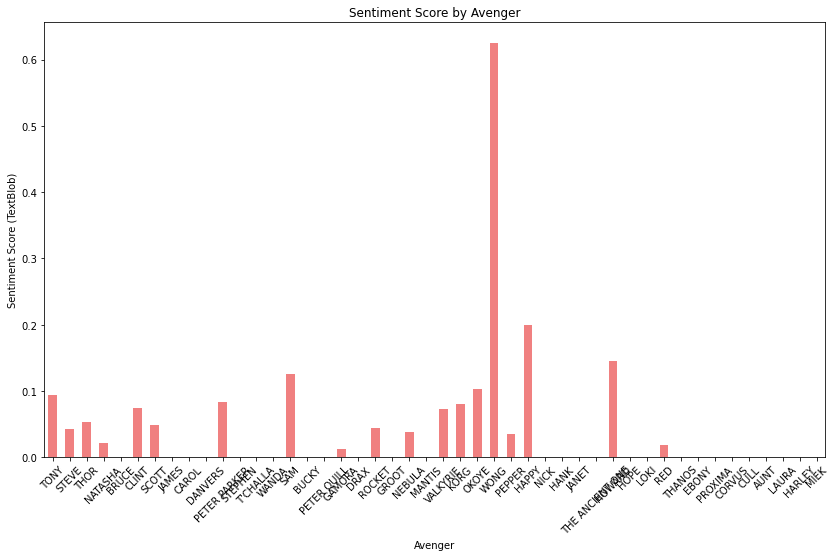

In [15]:
# Adjust the figure size
plt.figure(figsize=(14, 8))  # Change the width (12) and height (6) as needed

# Chart for Sentiment Score versus Avenger
df['Sentiment Score'].plot(kind='bar', color='lightcoral')
plt.title('Sentiment Score by Avenger')
plt.xlabel('Avenger')
plt.ylabel('Sentiment Score (TextBlob)')
plt.xticks(rotation=45)
plt.show()

### Chart of the overall sentiments TextBlob

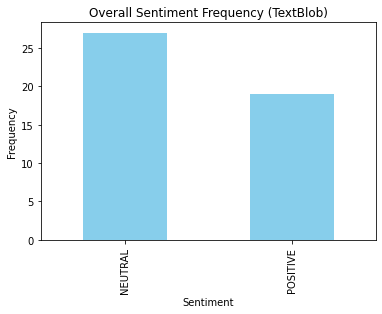

In [16]:
# Frequency chart for Overall Sentiment
sentiment_counts = df['Overall Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Overall Sentiment Frequency (TextBlob)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

## Sentiment Analysis using VADER of all lines for each avenger

In [17]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize a dictionary to store sentiment scores for each character
avengers_sentimental_vader = {}
avengers_sentimental_vader_avarage_score = 0

# Loop through all keys in the avenger_lines dictionary
for character, lines in avenger_lines.items():
    total_compound_score = 0

    # Perform sentiment analysis on each phrase for the current character
    for phrase in lines:
        sentiment_scores = analyzer.polarity_scores(phrase)

        # Get the compound sentiment score (a value between -1 and 1)
        compound_score = sentiment_scores['compound']

        # Add the compound score to the total
        total_compound_score += compound_score

    # Calculate the overall sentiment score for the current character
    if total_compound_score > 0:
        overall_sentiment = total_compound_score / len(lines)
    else:
        overall_sentiment = 0

    # Determine the overall sentiment based on the average score
    if overall_sentiment > 0:
        overall_sentiment_label = "POSITIVE" 
    elif overall_sentiment == 0:
        overall_sentiment_label = "NEUTRAL" 
    else: 
        overall_sentiment_label = "NEGATIVE"

    # Store the overall sentiment score and label in the new dictionary
    avengers_sentimental_vader[character] = {
        "Overall Sentiment": overall_sentiment_label,
        "Sentiment Score": overall_sentiment
    }
    
    avengers_sentimental_vader_avarage_score += overall_sentiment / len(avenger_lines.keys())

### Chart of the average sentiment score for each avenger using Vader

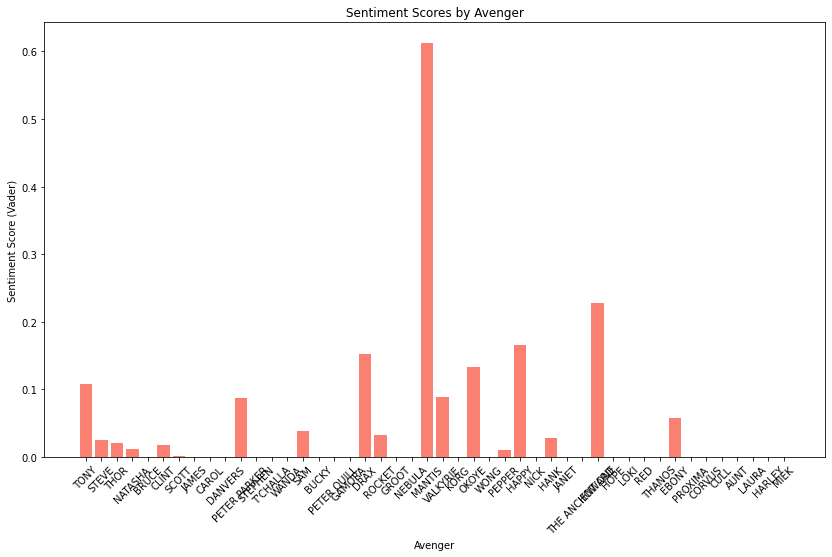

In [18]:
# Create lists to store sentiment labels and scores
sentiment_labels = []
sentiment_scores = []

# Extract sentiment information from the avengers_sentimental_vader dictionary
for character, sentiment in avengers_sentimental_vader.items():
    sentiment_labels.append(sentiment['Overall Sentiment'])
    sentiment_scores.append(sentiment['Sentiment Score'])

# Create a bar chart for sentiment scores by Avenger
plt.figure(figsize=(14, 8))
plt.bar(avengers_sentimental_vader.keys(), sentiment_scores, color='salmon')
plt.title('Sentiment Scores by Avenger')
plt.xlabel('Avenger')
plt.ylabel('Sentiment Score (Vader)')
plt.xticks(rotation=45)
plt.show()

### Chart of the overall sentiments using Vader

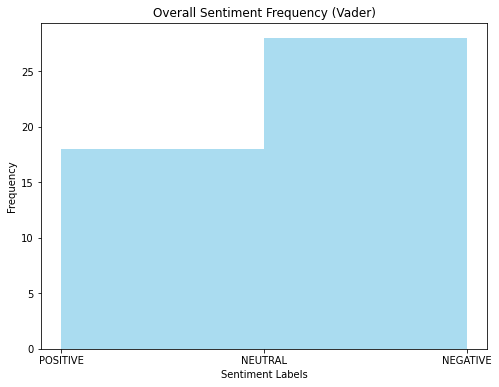

In [19]:
# Create a frequency chart for Overall Sentiment labels
plt.figure(figsize=(8, 6))
plt.hist(sentiment_labels, bins=['POSITIVE', 'NEUTRAL', 'NEGATIVE'], alpha=0.7, color='skyblue')
plt.title('Overall Sentiment Frequency (Vader)')
plt.xlabel('Sentiment Labels')
plt.ylabel('Frequency')
plt.show()

## Sentiment Analysis using Roberta of all lines for each avenger

In [20]:
# Create a dictionary to store cumulative sentiment scores
avengers_sentimental_roberta = defaultdict(float)
avengers_sentimental_roberta_avarage_score = 0

# Iterate through each key in avenger_lines
for key, phrases in avenger_lines.items():
    total_sentiment_score = 0.0
    num_phrases = len(phrases)

    # Perform sentiment analysis on each phrase and accumulate the scores
    for phrase in phrases:
        results = sentiment_analysis(phrase)
        sentiment_score = results[0]["score"]
        total_sentiment_score += sentiment_score
    
    # Calculate the average sentiment score
    if total_sentiment_score > 0: 
        average_sentiment_score = total_sentiment_score / num_phrases
    else:
        average_sentiment_score = 0

    # Determine the overall sentiment based on the average score
    if average_sentiment_score > 0.5:
        overall_sentiment = "POSITIVE" 
    elif average_sentiment_score >= 0.2:
        overall_sentiment = "NEUTRAL" 
    else: 
        overall_sentiment = "NEGATIVE"
        
    # Store the cumulative sentiment score for the current key
    avengers_sentimental_roberta[key] = [average_sentiment_score, overall_sentiment]
    
    avengers_sentimental_roberta_avarage_score += average_sentiment_score / len(avenger_lines.keys())

### Chart of the average sentiment score for each avenger using Roberta

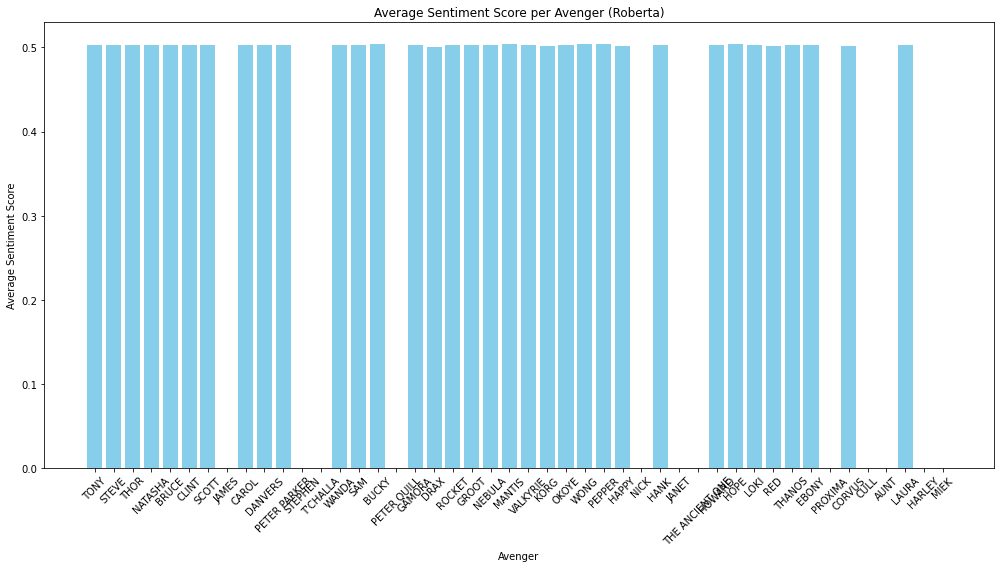

In [21]:
# Extract Avenger names, average sentiment scores, and overall sentiment scores
avengers = list(avengers_sentimental_roberta.keys())
average_sentiments = [entry[0] for entry in avengers_sentimental_roberta.values()]

# Create the first chart for average_sentiment_score
plt.figure(figsize=(14, 8))
plt.bar(avengers, average_sentiments, color='skyblue')
plt.xlabel('Avenger')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Avenger (Roberta)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the first chart
plt.show()

### Chart of the overall sentiments using Roberta

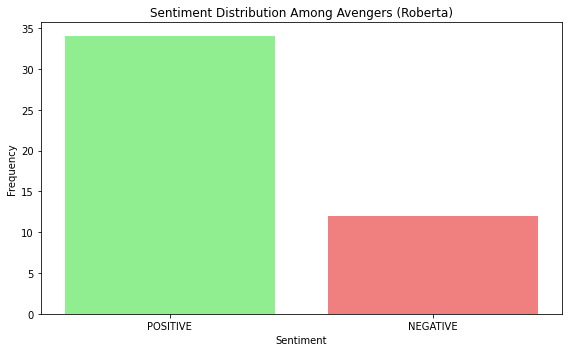

In [22]:
# Extract overall sentiments
overall_sentiments = [entry[1] for entry in avengers_sentimental_roberta.values()]

# Count the occurrences of each sentiment
sentiment_counts = Counter(overall_sentiments)

# Define the sentiment labels and counts
sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(sentiments, counts, color=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution Among Avengers (Roberta)')
plt.tight_layout()

# Show the chart
plt.show()

## Sentimental analysis including values ​​equal to zero

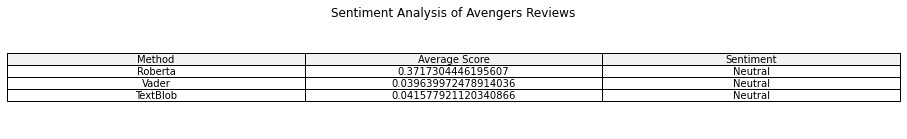

In [23]:
# Data
data = {
    'Method': ['Roberta', 'Vader', 'TextBlob'],
    'Average Score': [avengers_sentimental_roberta_avarage_score, 
                      avengers_sentimental_vader_avarage_score, 
                      avengers_sentimental_textblob_avarage_score]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to determine sentiment
def determine_sentiment(score):
    if data['Method'] == 'TextBlob' or data['Method'] == 'Vader':
        if data['Average Score'] > 0: 
            return 'Positive'
        elif data['Average Score'] == 0:
            return 'Neutral'
        else:
            return 'Negative'
    else:
        if data['Average Score'][0] > 0.5: 
            return 'Positive'
        elif data['Average Score'][0] >= 0.2:
            return 'Neutral'
        else:
            return 'Negative'

# Apply the sentiment determination function to the 'Average Score' column
df['Sentiment'] = df['Average Score'].apply(determine_sentiment)

# Plot the table
plt.figure(figsize=(16, 2))
plt.axis('off')  # Hide axis
plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=['#f2f2f2']*df.shape[1])
plt.title('Sentiment Analysis of Avengers Reviews')
plt.show()

RoBERTa: The average score here is approximately 0.407, which is the highest among the three and leans towards the positive end of the spectrum but is still classified as neutral. This indicates that while there might be some positive sentiment within the reviews, it's not overwhelmingly positive, and there's likely a balance of positive, neutral, and negative comments.

VADER: With an average score of approximately 0.0397, this is on the lower end of the neutral spectrum. VADER's scoring system typically considers scores above 0.05 as positive and below -0.05 as negative. A score this close to zero suggests a very balanced sentiment with perhaps a slight skew towards negativity.

TextBlob: This method provides an average score of approximately 0.0416, which is close to the score from VADER, indicating a neutral sentiment that's very balanced, possibly with a negligible tilt towards positivity.